In [1]:
from __future__ import print_function

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Exercise: Clustering Handwritten Digits
Let's try out some of our clustering exercises on our digits dataset (the original MNIST dataset we used with KNN).

Let's first fetch the dataset from the internet (which may take a while, note the asterisk [*]):

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

In [5]:
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

from six.moves import urllib

try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")

%matplotlib inline
import matplotlib.pyplot as plt
X_digits = mnist['data']
Y_digits = mnist['target']

In [7]:
X_digits.shape

(70000, 784)

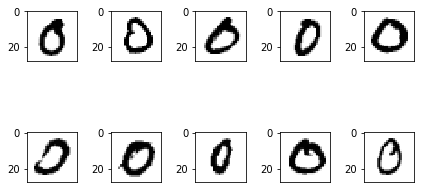

In [8]:
plt.rc("image", cmap="binary") # use black/white palette for plotting
minimum = 200
for i in range(minimum, minimum+10):
    plt.subplot(2,5,i+1-minimum)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
#     plt.yticks(())
#     print (Y_digits[i])
plt.tight_layout()

In [9]:
X_digits, Y_digits = shuffle(X_digits, Y_digits) # shuffle dataset (which is ordered!)
X_digits = X_digits[-5000:]       # take only the last instances, to shorten runtime of KMeans

Let's have a look at some of the instances in the dataset we just loaded:

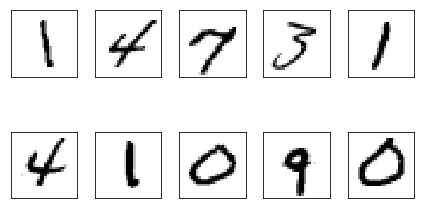

In [10]:
plt.rc("image", cmap="binary") # use black/white palette for plotting
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

In [11]:
X_digits[0].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  49,
        233,  86,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 184,
        252, 137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [30]:
pd.Series(Y_digits).value_counts()

1.0    7877
7.0    7293
3.0    7141
2.0    6990
9.0    6958
0.0    6903
6.0    6876
8.0    6825
4.0    6824
5.0    6313
dtype: int64

Try creating a KMeans clusterer with 20 classes (obviously 10 would be ideal, but let's try 20 first).  Fit the model to the digits data.

In [13]:
km = KMeans(n_clusters=20)

In [14]:
km.fit(X_digits)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Store the means of the clusters (the centroids) in a variable called `mu_digits` via a call to `cluster_centers_`:

In [15]:
mu_digits = km.cluster_centers_

In [16]:
mu_digits.shape

(20, 784)

In [17]:
type(km.labels_)

numpy.ndarray

In [18]:
km.labels_.min()

0

Now let's take a look at those "mean digits".  What is going on here?

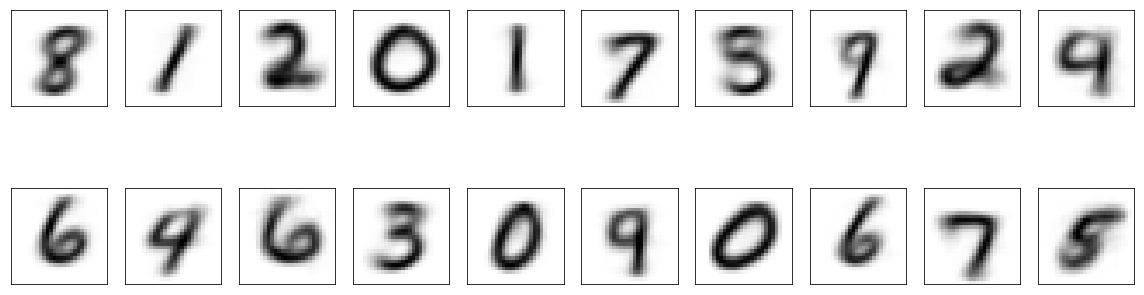

In [19]:
plt.figure(figsize=(16,6))
for i in range(2*(mu_digits.shape[0]//2)): # loop over all means
    plt.subplot(2,mu_digits.shape[0]/2,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

In [20]:
km = KMeans(n_clusters=10)

In [21]:
km.fit(X_digits)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
mu_digits = km.cluster_centers_

In [23]:
mu_digits.shape

(10, 784)

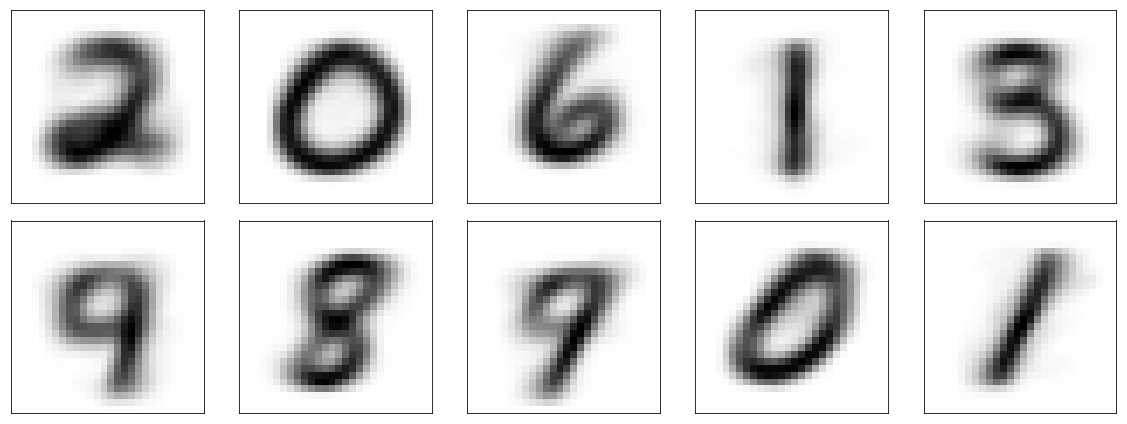

In [24]:
plt.figure(figsize=(16,6))
for i in range(2*(mu_digits.shape[0]//2)): # loop over all means
    plt.subplot(2,mu_digits.shape[0]/2,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

Now that you've tried 20 clusters, let's see where the optimum is.  Try building a loop that tries out different values of k and stores the resulting silhouette coefficients.  What do you find the optimum k value to be?  Is it 10 as we might hope?

In [25]:
def get_cluster_centers(X, labels, k_num):
    CC_list = []
    for k in range(k_num):
        # get the mean coordinates of each cluster
        CC_list.append(np.mean(X[labels == k], axis = 0))
    return CC_list

# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it
def get_SSE(X, labels):
    k_num = len(np.unique(labels))
    CC_list = get_cluster_centers(X, labels, k_num)
    CSEs = []
    for k in range(k_num):
        # for each cluster of k we get the coordinates of how far off each point is to the cluster
        error_cords = X[labels == k] - CC_list[k]
        # square the coordinates and sum to get the magnitude squared
        error_cords_sq = error_cords ** 2
        error_mag_sq = np.sum(error_cords_sq, axis = 1)
        # since we already have the magnitude of the error squared we can just take the sum for the cluster
        CSE = np.sum(error_mag_sq)
        CSEs.append(CSE)
    # sum each cluster's sum of squared errors
    return sum(CSEs)

In [27]:
SSEs = []
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_digits)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(X_digits, labels, metric='euclidean'))
    SSEs.append(km.inertia_) # The SSE is just inertia, we
                                            # could have just said km.inertia_

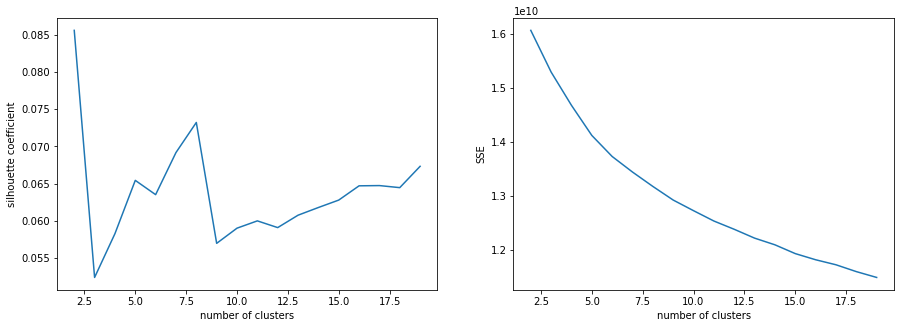

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [29]:
Sil_coefs

[0.085599296107186543,
 0.052395458727938993,
 0.058276910138799647,
 0.065440224051352733,
 0.063521883452811789,
 0.069178369551950281,
 0.073221970161515618,
 0.056977309575189164,
 0.059017583346539712,
 0.059997435855787686,
 0.059094018983378307,
 0.060759544297965207,
 0.061794303398625655,
 0.062791110856127527,
 0.064708197898828507,
 0.064740573978456173,
 0.064463085406647774,
 0.067328585134713792]